In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [60]:
df = pd.read_csv("/content/HousingData.csv")

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [11]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
df.shape

(506, 14)

In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [14]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [96]:
'''
col   outliers missing val
CRIM    Y         y             Median
ZN      y         y             Median
INDUS   N         Y             Mean
CHAS    Y         Y             Median
NOX     N         N
RM      Y         N
AGE     N         Y             Mean
DIS     Y         N
RAD     N         N
TAX     N         N
PTRATIO Y         N
B       Y         N
LSTAT   Y         Y             Median
MEDV    Y         N

'''

'\ncol   outliers missing val \nCRIM    Y         y             Median\nZN      y         y             Median\nINDUS   N         Y             Mean \nCHAS    Y         Y             Median\nNOX     N         N \nRM      Y         N               \nAGE     N         Y             Mean\nDIS     Y         N \nRAD     N         N\nTAX     N         N \nPTRATIO Y         N \nB       Y         N \nLSTAT   Y         Y             Median \nMEDV    Y         N \n\n'

In [63]:
df["CRIM"].fillna(df["CRIM"].median(),inplace=True)
df["ZN"].fillna(df["ZN"].median(),inplace=True)
df["INDUS"].fillna(df["INDUS"].median(),inplace=True)
df["CHAS"].fillna(df["CHAS"].median(),inplace=True)
df["AGE"].fillna(df["AGE"].mean(),inplace=True)
df["LSTAT"].fillna(df["LSTAT"].mean(),inplace=True)

In [27]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [64]:
df.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Checking the Assumptions of LR
1. Linearity
2. No Multicolinearity
3. Normality of Residule
4. Homoscadasity

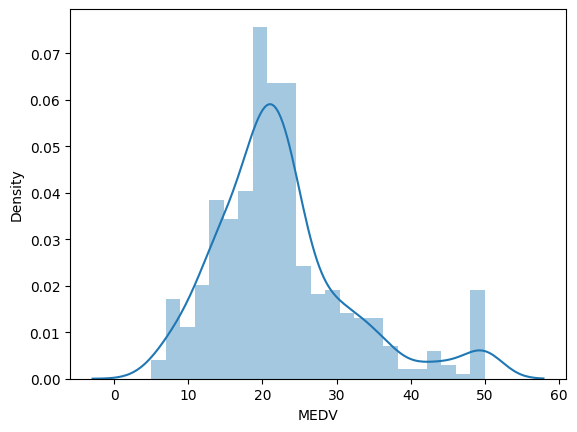

In [110]:
# Normality of Data Distribution
sns.distplot(df['MEDV'])
plt.show()

<Axes: >

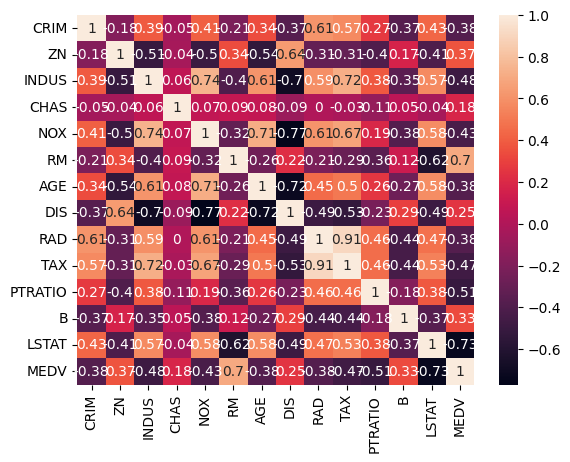

In [ ]:
# No Multicolinearity 0.56789454 -> 0.57
sns.heatmap(data=df.corr().round(2),annot=True,cbar=True)

In [ ]:
# plt.scatter(df['CRIM'],df['MEDV'])

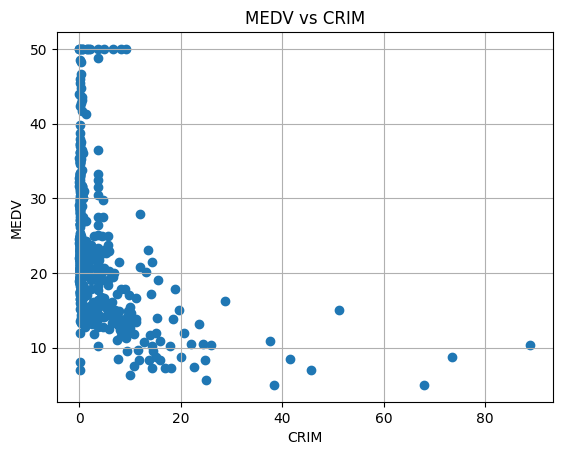

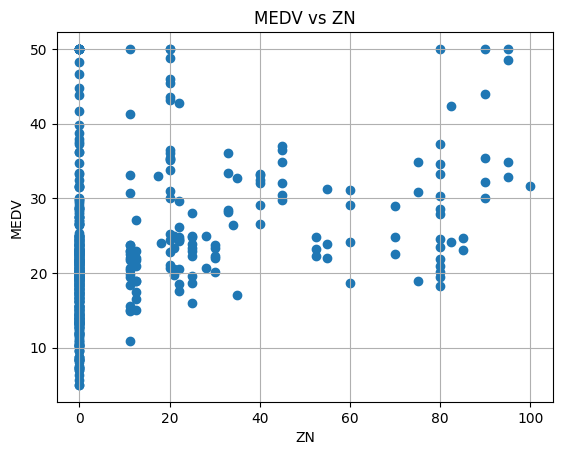

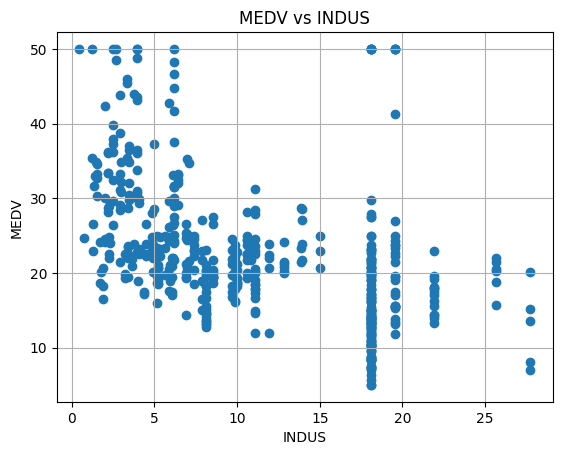

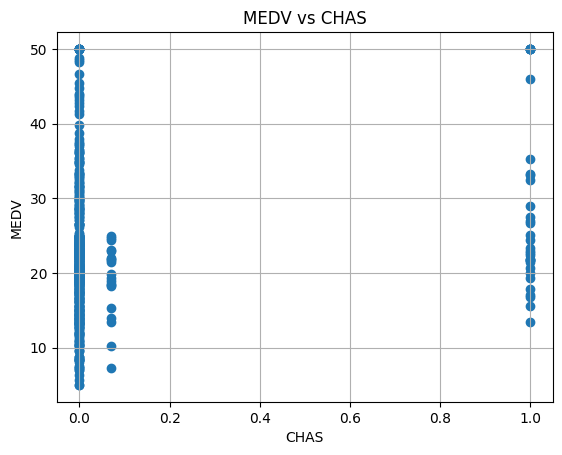

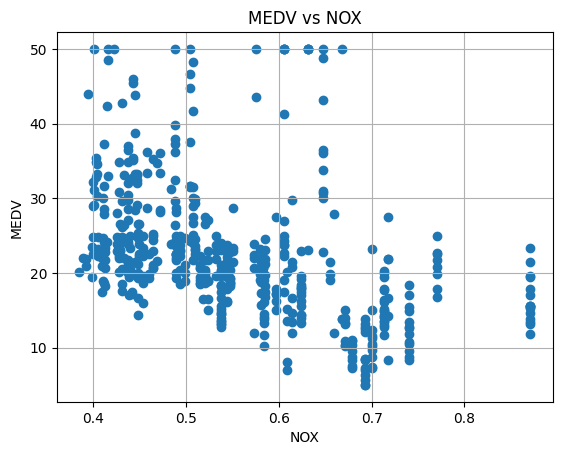

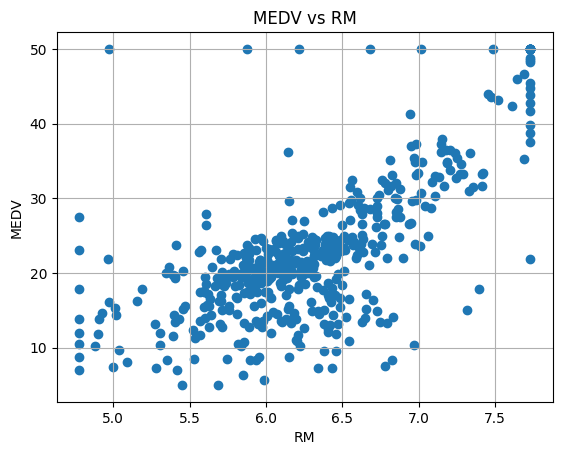

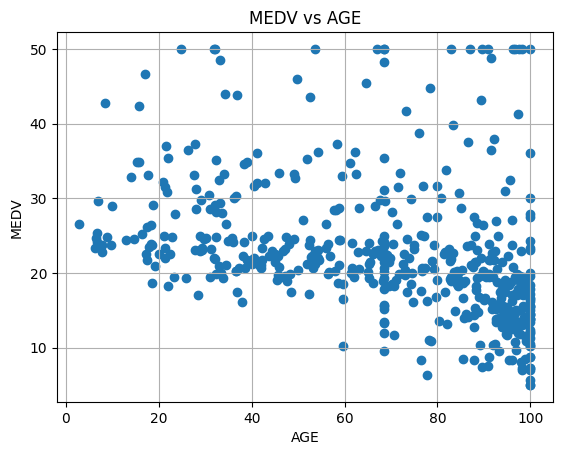

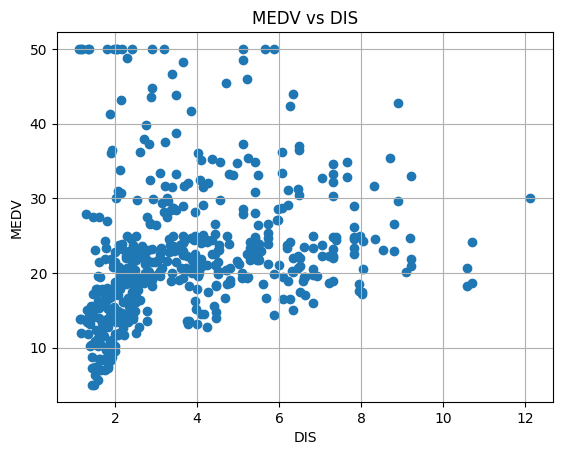

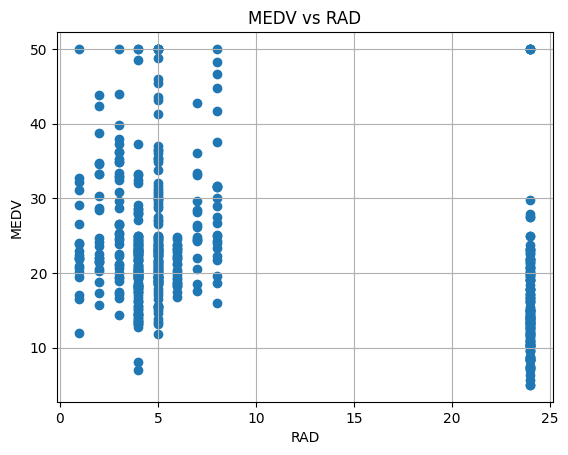

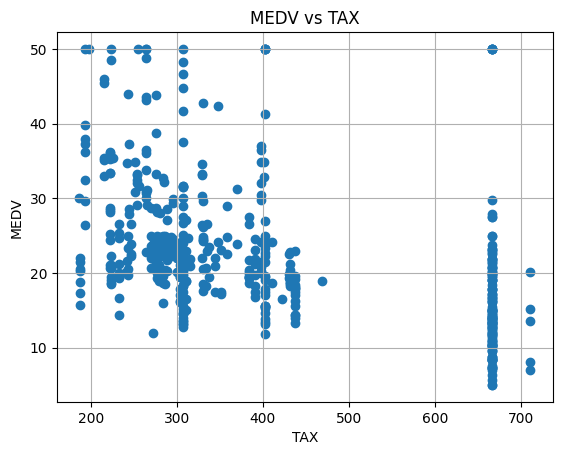

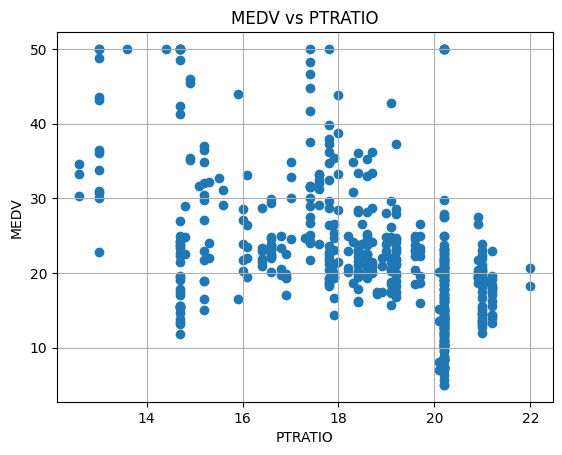

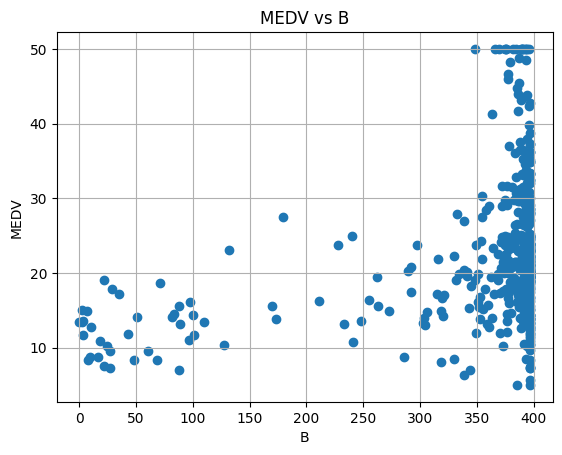

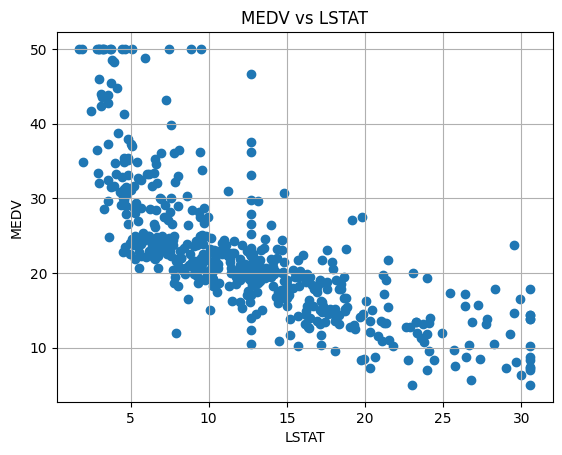

In [ ]:
# Checking the Linearity of the Features

# Select features (excluding MEDV)
features = df.columns.tolist()
features.remove('MEDV')  # Remove MEDV from the list

# Iterate through features and create scatter plots
for feature in features:
    plt.scatter(df[feature], df['MEDV'])
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'MEDV vs {feature}')
    plt.grid(True)
    plt.show()

only 'RM' and 'LSTAT' column have relation with the output column

In [ ]:
x = df[['LSTAT','RM']]
y = df['MEDV']

In [ ]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(404, 2)

# Defining the model  

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train,pred)))
r2 = r2_score(y_train,pred)

In [ ]:
print('FOR TRAINING DATA')
print('------MODEL PERFORMANCE-----')
print(f'RMSE SCORE: {rmse}')
print(f'R2 SCORE: {r2}')

FOR TRAINING DATA
------MODEL PERFORMANCE-----
RMSE SCORE: 5.697493017341628
R2 SCORE: 0.6221096019952459


In [ ]:
y_test_pred = model.predict(x_test)
rmse_t = (np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2_t = r2_score(y_test,y_test_pred)

In [ ]:
print('FOR TESTING DATA')
print('------MODEL PERFORMANCE-----')
print(f'RMSE SCORE: {rmse_t}')
print(f'R2 SCORE: {r2_t}')

FOR TESTING DATA
------MODEL PERFORMANCE-----
RMSE SCORE: 5.023608183111099
R2 SCORE: 0.6776677459544105
